In [29]:
%pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.4 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.4 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd

data = pd.read_csv('data/MLTollsStackOverflow.csv')

In [31]:
data

month  nltk  spacy  stanford-nlp  python     r  numpy  scipy  matlab  \
0    09-Jan     0      0             0     631     8      6      2      19   
1    09-Feb     1      0             0     633     9      7      3      27   
2    09-Mar     0      0             0     766     4      4      2      24   
3    09-Apr     0      0             0     768    12      6      3      32   
4    09-May     1      0             0    1003     2      7      2      42   
..      ...   ...    ...           ...     ...   ...    ...    ...     ...   
127  19-Aug    57     76            24   20257  4486   1111    212     371   
128  19-Sep    54     62            16   19207  4474   1020    135     362   
129  19-Oct    73     79            27   23414  5138   1310    188     523   
130  19-Nov    72     79            14   23602  4883   1297    199     479   
131  19-Dec    82     72            13   20058  4150   1118    159     349   

     machine-learning  ...  Plato  Sympy  Flair  stanford-nlp.1  pyqt  \
0                   8  ...      0      1      0               0     5   
1                   4  ...      0      0      0               0     5   
2                   3  ...      0      0      0               0     7   
3                  10  ...      0      0      0               0    11   
4                   7  ...      0      0      0               0    10   
..                ...  ...    ...    ...    ...             ...   ...   
127               583  ...      0     33      0              22   144   
128               538  ...      0     39      0              15   147   
129               750  ...      0     72      0              27   170   
130               918  ...      0     58      2              14   182   
131               983  ...      0     56      0              13   173   

     Nolearn  Lasagne  OCR  Apache-spark-mlib  azure-virtual-machine  
0          0        0    5                  0                      0  
1          0        0   11                  0                      0  
2          0        0    2                  0                      0  
3          0        0    5                  0                      0  
4          0        0    3                  0                      0  
..       ...      ...  ...                ...                    ...  
127        0        0   40                 16                     25  
128        0        4   49                 28                     16  
129        0        3   70                 21                     19  
130        0        1   73                 16                     19  
131        0        0   56                 16                     18  

[132 rows x 82 columns]

In [32]:
data = pd.melt(data, id_vars=['month'], var_name='topic', value_name='questions')

In [33]:
data

month                  topic  questions
0      09-Jan                   nltk        0.0
1      09-Feb                   nltk        1.0
2      09-Mar                   nltk        0.0
3      09-Apr                   nltk        0.0
4      09-May                   nltk        1.0
...       ...                    ...        ...
10687  19-Aug  azure-virtual-machine       25.0
10688  19-Sep  azure-virtual-machine       16.0
10689  19-Oct  azure-virtual-machine       19.0
10690  19-Nov  azure-virtual-machine       19.0
10691  19-Dec  azure-virtual-machine       18.0

[10692 rows x 3 columns]

In [34]:
data['month'] = pd.to_datetime(data.month, format="%y-%b")

In [35]:
data['topic'] = data.topic.astype('category')

In [36]:
data = data.set_index(['month', 'topic']).sort_index()

In [37]:
data

questions
month      topic                       
2009-01-01 AllenNLP                 0.0
           Apache                  95.0
           Apache-spark-mlib        0.0
           BeautifulSoup            5.0
           Colab                    0.0
...                                 ...
2019-12-01 spacy                   72.0
           stanford-nlp            13.0
           stanford-nlp.1          13.0
           tensorflow            1392.0
           time-series            185.0

[10692 rows x 1 columns]

<Axes: xlabel='month'>

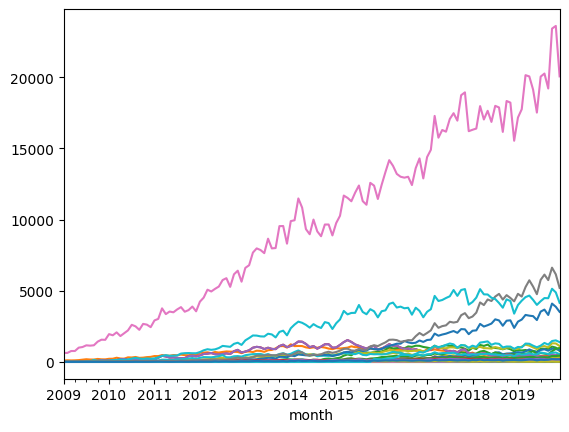

In [38]:
data.unstack().plot(legend=False)